<a href="https://colab.research.google.com/github/espadaone/PF_UCI-/blob/main/Analisis_tablas_6_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive  # Vinculamos google colab con google drive para importar el dataset
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importamos librerias
import pandas as pd         
import missingno as msno  

In [3]:
# Cargamos los datasets y guardamos en una variable para trabajarlos
df_caregivers = pd.read_csv('/content/drive/MyDrive/Formación/Henry/PF UCI/dataset/CAREGIVERS.csv', sep=',', encoding='latin-1')
df_chartevents = pd.read_csv('/content/drive/MyDrive/Formación/Henry/PF UCI/dataset/CHARTEVENTS.csv', sep=',', encoding='latin-1')
df_datetimeevents = pd.read_csv('/content/drive/MyDrive/Formación/Henry/PF UCI/dataset/DATETIMEEVENTS.csv', sep=',', encoding='latin-1')
df_inputevents_cv = pd.read_csv('/content/drive/MyDrive/Formación/Henry/PF UCI/dataset/INPUTEVENTS_CV.csv', sep=',', encoding='latin-1')
df_transfers = pd.read_csv('/content/drive/MyDrive/Formación/Henry/PF UCI/dataset/TRANSFERS.csv', sep=',', encoding='latin-1')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (8,10,13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (17,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Analisis de datasets

## Tabla 'TRANSFERS' o 'translados'

+ Descripción de la tabla: Traslado de pacientes de una cama a otra dentro del hospital

In [33]:
df_transfers.head(3)   # Mostramos las primeras filas

,row_id,subject_id,hadm_id,icustay_id,dbsource,eventtype,prev_careunit,curr_careunit,prev_wardid,curr_wardid,intime,outtime,los
0,54440,10006,142345,206504.0,carevue,admit,NaN,MICU,NaN,52.0,2164-10-23 21:10:15,2164-10-25 12:21:07,39.18
1,54441,10006,142345,NaN,carevue,transfer,MICU,NaN,52.0,45.0,2164-10-25 12:21:07,2164-11-01 17:14:27,172.89
2,54442,10006,142345,NaN,carevue,discharge,NaN,NaN,45.0,NaN,2164-11-01 17:14:27,NaN,NaN


Campos:

+ *row_id*: id de fila
+ *subject_id*: id de paciente (a confirmar)
+ *hadm_id*: no se
+ *icustay_id*: id de custodio o persona a cargo del paciente (a confirmar)
+ *dbsource*: fuente de datos (ej: carevue es un sistema de monitoreo de pacientes)
+ *eventtype*: tipo de evento.
+ *prev_careunit*: unidad de cuidado previo
+ *curr_careunit*: unidad de cuidado actual o de destino
+ *prev_wardid*: id de pabellón previo
+ *curr_wardid*: id de pabellón actual o de destino
+ *intime*: hora y fecha de ingreso
+ *outtime*: hora y fecha de salida
+ *los*: diferencia entre tiempo de entrada y salida.


In [9]:
print("Valores únicos por cada columna: \n")

print("row_id:", df_transfers['row_id'].nunique() )
print("subject_id:", df_transfers['subject_id'].nunique() )
print("hadm_id:", df_transfers['hadm_id'].nunique() )
print("icustay_id:", df_transfers['icustay_id'].nunique() )
print("dbsource:", df_transfers['dbsource'].nunique() )
print("eventtype:", df_transfers['eventtype'].nunique() )
print("prev_careunit:", df_transfers['prev_careunit'].nunique() )
print("curr_careunit:", df_transfers['curr_careunit'].nunique() )
print("prev_wardid:", df_transfers['prev_wardid'].nunique() )
print("curr_wardid:", df_transfers['curr_wardid'].nunique() )
print("intime:", df_transfers['intime'].nunique() )
print("outtime:", df_transfers['outtime'].nunique() )
print("los:", df_transfers['los'].nunique() )

Valores únicos por cada columna: 

row_id: 524
subject_id: 100
hadm_id: 129
icustay_id: 136
dbsource: 2
eventtype: 3
prev_careunit: 5
curr_careunit: 5
prev_wardid: 28
curr_wardid: 28
intime: 524
outtime: 395
los: 380


In [34]:
df_transfers.info()  # Cant de registros, columnas, espacio en memoria, tipo de dato

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524 entries, 0 to 523
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row_id         524 non-null    int64  
 1   subject_id     524 non-null    int64  
 2   hadm_id        524 non-null    int64  
 3   icustay_id     167 non-null    float64
 4   dbsource       524 non-null    object 
 5   eventtype      524 non-null    object 
 6   prev_careunit  167 non-null    object 
 7   curr_careunit  167 non-null    object 
 8   prev_wardid    395 non-null    float64
 9   curr_wardid    395 non-null    float64
 10  intime         524 non-null    object 
 11  outtime        395 non-null    object 
 12  los            395 non-null    float64
dtypes: float64(4), int64(3), object(6)
memory usage: 53.3+ KB


In [35]:
df_transfers.drop_duplicates(inplace=True)   # Eliminamos registros duplicados
df_transfers.shape[0]

524

No tenia registros duplicados

In [37]:
df_transfers.isna().sum()  # Valores nulos

row_id             0
subject_id         0
hadm_id            0
icustay_id       357
dbsource           0
eventtype          0
prev_careunit    357
curr_careunit    357
prev_wardid      129
curr_wardid      129
intime             0
outtime          129
los              129
dtype: int64

<AxesSubplot:>

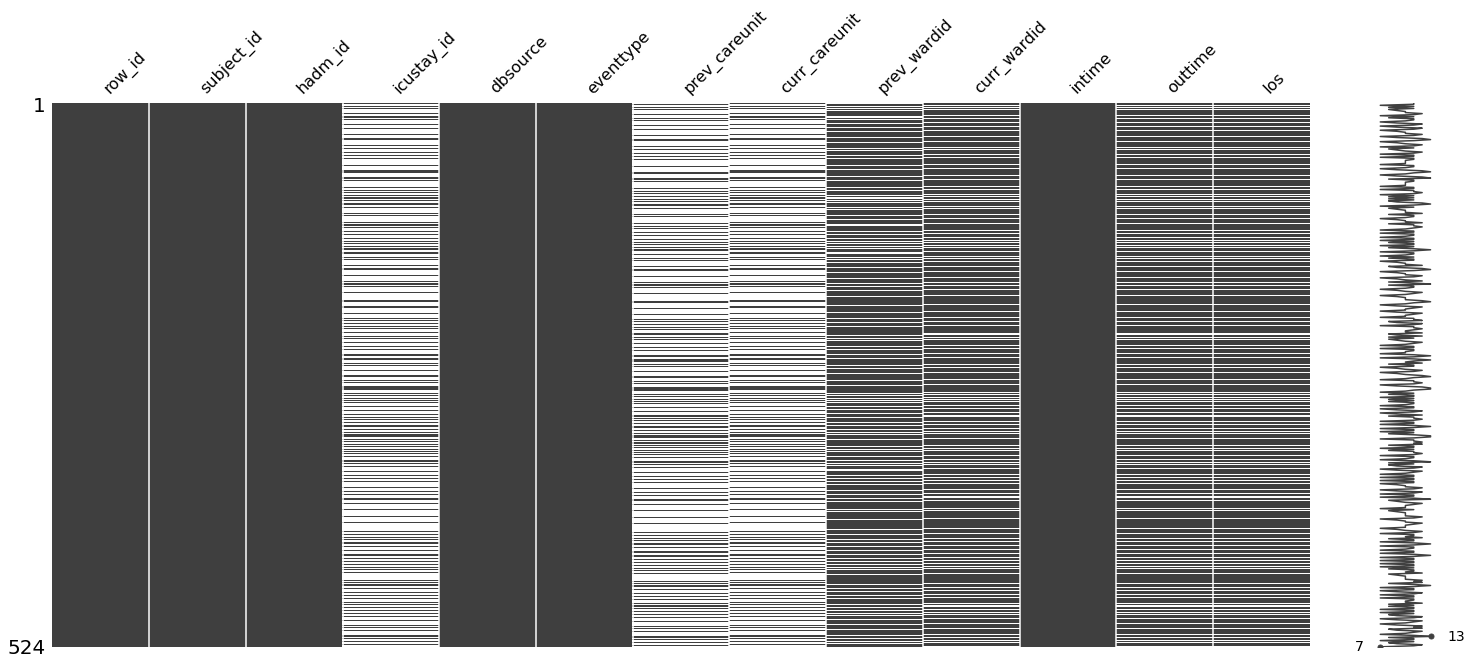

In [38]:
msno.matrix(df_transfers)  # Valores nulos visto gráficamente

Valores nulos:

## Tabla 'CAREGIVERS' o 'cuidadores'

+ Descripcion de la tabla: Cada cuidador que haya registrado datos

In [5]:
df_caregivers.head(3)   # Mostramos las primeras filas

,row_id,cgid,label,description
0,2228,16174,RO,Read Only
1,2229,16175,RO,Read Only
2,2230,16176,Res,Resident/Fellow/PA/NP


Campos:

+ *row_id*: id de fila
+ *cgid*: id del cuidador / enfermero
+ *label*: etiqueta de descripcion
+ *description*: alcance de responsabilidades (a confirmar)


In [13]:
print("Valores únicos por cada columna: \n")

print("row_id:", df_caregivers['row_id'].nunique() )
print("cgid:", df_caregivers['cgid'].nunique() )
print("label:", df_caregivers['label'].nunique() )
print("description:", df_caregivers['description'].nunique() )

Valores únicos por cada columna: 

row_id: 7567
cgid: 7567
label: 230
description: 16


In [14]:
df_caregivers.info()  # Cant de registros, columnas, espacio en memoria, tipo de dato

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7567 entries, 0 to 7566
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   row_id       7567 non-null   int64 
 1   cgid         7567 non-null   int64 
 2   label        7518 non-null   object
 3   description  5155 non-null   object
dtypes: int64(2), object(2)
memory usage: 236.6+ KB


In [15]:
df_caregivers.drop_duplicates(inplace=True)   # Eliminamos registros duplicados
df_caregivers.shape[0]

7567

No tenia registros duplicados

In [16]:
df_caregivers.isna().sum()  # Valores nulos

row_id            0
cgid              0
label            49
description    2412
dtype: int64

<AxesSubplot:>

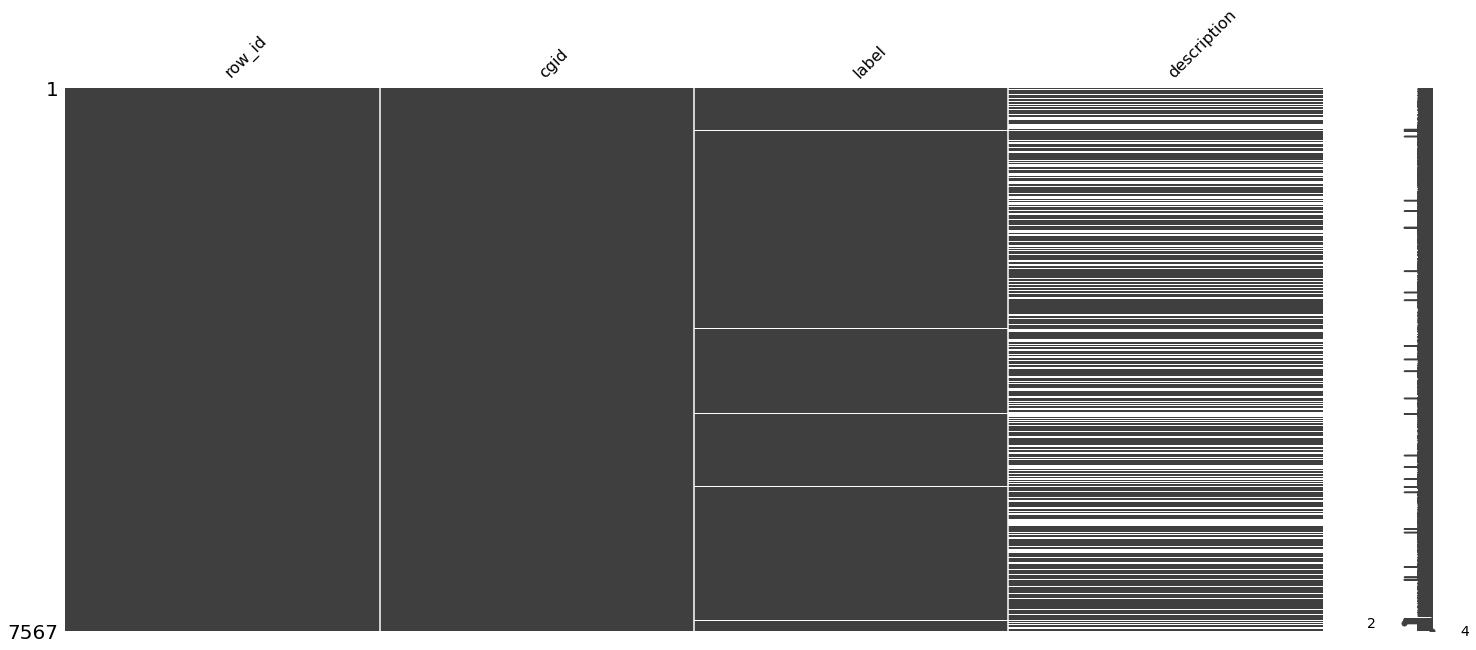

In [17]:
msno.matrix(df_caregivers)  # Valores nulos visto gráficamente

Valores nulos:

+ 'label' : completar con la leyenda 'sin dato' ya que son textos.
+ 'description' : completar con la leyenda 'sin dato' ya que son textos.

## Tabla 'CHARTEVENTS' o '¿gráfico de eventos?'

+ Descripción de la tabla: Todas las observaciones de los pacientes

In [17]:
df_chartevents.head(3)   # Mostramos las primeras filas

,row_id,subject_id,hadm_id,icustay_id,itemid,charttime,storetime,cgid,value,valuenum,valueuom,warning,error,resultstatus,stopped
0,5279021,40124,126179,279554.0,223761,2130-02-04 04:00:00,2130-02-04 04:35:00,19085,95.9,95.9,?F,0.0,0.0,NaN,NaN
1,5279022,40124,126179,279554.0,224695,2130-02-04 04:25:00,2130-02-04 05:55:00,18999,2222221.7,2222221.7,cmH2O,0.0,0.0,NaN,NaN
2,5279023,40124,126179,279554.0,220210,2130-02-04 04:30:00,2130-02-04 04:43:00,21452,15.0,15.0,insp/min,0.0,0.0,NaN,NaN


Campos:

+ *row_id*: id de fila
+ *subject_id*: id de paciente (a confirmar)
+ *hadm_id*: no se
+	*icustay_id*:
+	*itemid*:	
+ *charttime*:
+	*storetime*:
+	*cgid*: id del cuidador / enfermero
+	*value*:
+	*valuenum*:
+	*valueuom*:
+	*warning*: valor binario (0 o 1), 1 verdadero y 0 falso
+	*error*: valor binario (0 o 1), 1 verdadero y 0 falso
+	*resultstatus*:
+	*stopped*:

In [18]:
print("Valores únicos por cada columna: \n")

print("row_id:", df_chartevents['row_id'].nunique() )
print("subject_id:", df_chartevents['subject_id'].nunique() )
print("hadm_id:", df_chartevents['hadm_id'].nunique() )
print("icustay_id:", df_chartevents['icustay_id'].nunique() )
print("itemid:", df_chartevents['itemid'].nunique() )
print("charttime:", df_chartevents['charttime'].nunique() )
print("storetime:", df_chartevents['storetime'].nunique() )
print("cgid:", df_chartevents['cgid'].nunique() )
print("value:", df_chartevents['value'].nunique() )
print("valuenum:", df_chartevents['valuenum'].nunique() )
print("valueuom:", df_chartevents['valueuom'].nunique() )
print("warning:", df_chartevents['warning'].nunique() )
print("error:", df_chartevents['error'].nunique() )
print("resultstatus:", df_chartevents['resultstatus'].nunique() )
print("stopped:", df_chartevents['stopped'].nunique() )

Valores únicos por cada columna: 

row_id: 758355
subject_id: 99
hadm_id: 126
icustay_id: 133
itemid: 1679
charttime: 30866
storetime: 48532
cgid: 592
value: 10862
valuenum: 8034
valueuom: 71
error: 2
resultstatus: 2
stopped: 2


In [18]:
df_chartevents.info()  # Cant de registros, columnas, espacio en memoria, tipo de dato

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758355 entries, 0 to 758354
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   row_id        758355 non-null  int64  
 1   subject_id    758355 non-null  int64  
 2   hadm_id       758355 non-null  int64  
 3   icustay_id    758274 non-null  float64
 4   itemid        758355 non-null  int64  
 5   charttime     758355 non-null  object 
 6   storetime     758355 non-null  object 
 7   cgid          758355 non-null  int64  
 8   value         755630 non-null  object 
 9   valuenum      323884 non-null  float64
 10  valueuom      239855 non-null  object 
 11  warning       382279 non-null  float64
 12  error         382279 non-null  float64
 13  resultstatus  21674 non-null   object 
 14  stopped       374649 non-null  object 
dtypes: float64(4), int64(5), object(6)
memory usage: 86.8+ MB


In [20]:
df_chartevents.drop_duplicates(inplace=True)   # Eliminamos registros duplicados
df_chartevents.shape[0]

758355

No tenia registros duplicados

In [21]:
df_chartevents.isna().sum()  # Valores nulos

row_id               0
subject_id           0
hadm_id              0
icustay_id          81
itemid               0
charttime            0
storetime            0
cgid                 0
value             2725
valuenum        434471
valueuom        518500
warning         376076
error           376076
resultstatus    736681
stopped         383706
dtype: int64

<AxesSubplot:>

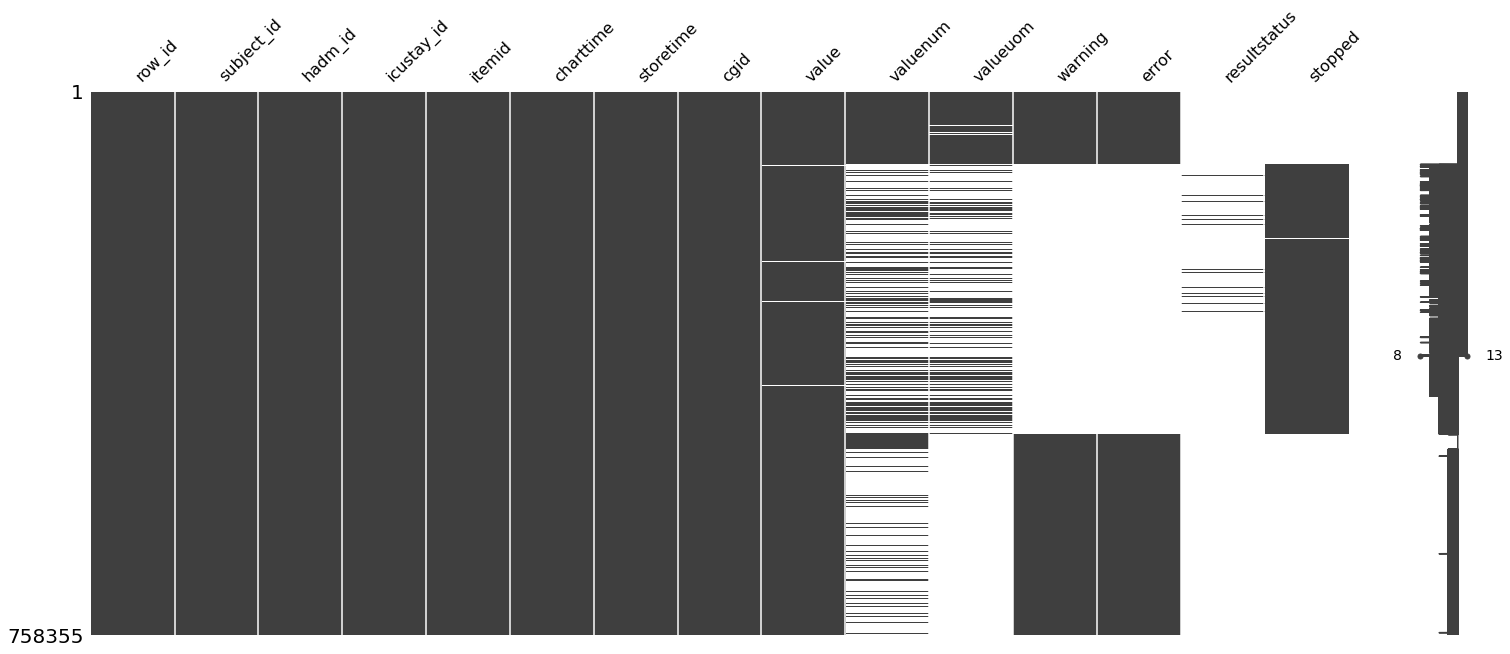

In [22]:
msno.matrix(df_chartevents)  # Valores nulos visto gráficamente

Valores nulos: 
+ value:
+ valuenum:
+ valueuom:
+ warning: completaria con 0
+ error: completaria con 0
+ resultstatus:
+ stopped:

## Tabla 'DATETIMEEVENTS' o 'dia y hora de eventos'

+ Descripción de la tabla: Todas las observaciones que sean fechas, la hora de
la diálisis etc

In [23]:
df_datetimeevents.head(3)   # Mostramos las primeras filas

,row_id,subject_id,hadm_id,icustay_id,itemid,charttime,storetime,cgid,value,valueuom,warning,error,resultstatus,stopped
0,208474,10076,198503,201006.0,5684,2107-03-25 04:00:00,2107-03-25 04:34:00,20482,2107-03-24 00:00:00,Date,NaN,NaN,NaN,NotStopd
1,208475,10076,198503,201006.0,5684,2107-03-25 07:00:00,2107-03-25 07:06:00,15004,2107-03-24 00:00:00,Date,NaN,NaN,NaN,NotStopd
2,208836,10076,198503,201006.0,5684,2107-03-26 04:00:00,2107-03-26 05:31:00,20834,2107-03-24 00:00:00,Date,NaN,NaN,NaN,NotStopd


Campos:
+ row_id: id de fila
+ subject_id: id de paciente (a confirmar)
+ hadm_id: no se
+ icustay_id: id de custodio o persona a cargo del paciente (a confirmar)
+ itemid:	
+ charttime:	
+ storetime:	
+ cgid:	
+ value:	
+ valueuom:	
+ warning: valor binario (1 y 0), 1 verdadero y 0 falso	
+ error: valor binario (1 y 0), 1 verdadero y 0 falso	
+ resultstatus:	
+ stopped:

In [24]:
print("Valores únicos por cada columna: \n")

print("row_id:", df_datetimeevents['row_id'].nunique() )
print("subject_id:", df_datetimeevents['subject_id'].nunique() )
print("hadm_id:", df_datetimeevents['hadm_id'].nunique() )
print("icustay_id:", df_datetimeevents['icustay_id'].nunique() )
print("itemid:", df_datetimeevents['itemid'].nunique() )
print("charttime:", df_datetimeevents['charttime'].nunique() )
print("storetime:", df_datetimeevents['storetime'].nunique() )
print("cgid:", df_datetimeevents['cgid'].nunique() )
print("value:", df_datetimeevents['value'].nunique() )
print("valueuom:", df_datetimeevents['valueuom'].nunique() )
print("warning:", df_datetimeevents['warning'].nunique() )
print("error:", df_datetimeevents['error'].nunique() )
print("resultstatus:", df_datetimeevents['resultstatus'].nunique() )
print("stopped:", df_datetimeevents['stopped'].nunique() )

Valores únicos por cada columna: 

row_id: 15551
subject_id: 71
hadm_id: 95
icustay_id: 102
itemid: 80
charttime: 3819
storetime: 3844
cgid: 305
value: 944
valueuom: 2
error: 1
resultstatus: 0
stopped: 2


In [24]:
df_datetimeevents.info()  # Cant de registros, columnas, espacio en memoria, tipo de dato

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15551 entries, 0 to 15550
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   row_id        15551 non-null  int64  
 1   subject_id    15551 non-null  int64  
 2   hadm_id       15551 non-null  int64  
 3   icustay_id    15539 non-null  float64
 4   itemid        15551 non-null  int64  
 5   charttime     15551 non-null  object 
 6   storetime     15551 non-null  object 
 7   cgid          15551 non-null  int64  
 8   value         15467 non-null  object 
 9   valueuom      15551 non-null  object 
 10  warning       10914 non-null  float64
 11  error         10914 non-null  float64
 12  resultstatus  0 non-null      float64
 13  stopped       4637 non-null   object 
dtypes: float64(4), int64(5), object(5)
memory usage: 1.7+ MB


In [25]:
df_datetimeevents.drop_duplicates(inplace=True)   # Eliminamos registros duplicados
df_datetimeevents.shape[0]

15551

No tenia registros duplicados

In [26]:
df_datetimeevents.isna().sum()  # Valores nulos

row_id              0
subject_id          0
hadm_id             0
icustay_id         12
itemid              0
charttime           0
storetime           0
cgid                0
value              84
valueuom            0
warning          4637
error            4637
resultstatus    15551
stopped         10914
dtype: int64

<AxesSubplot:>

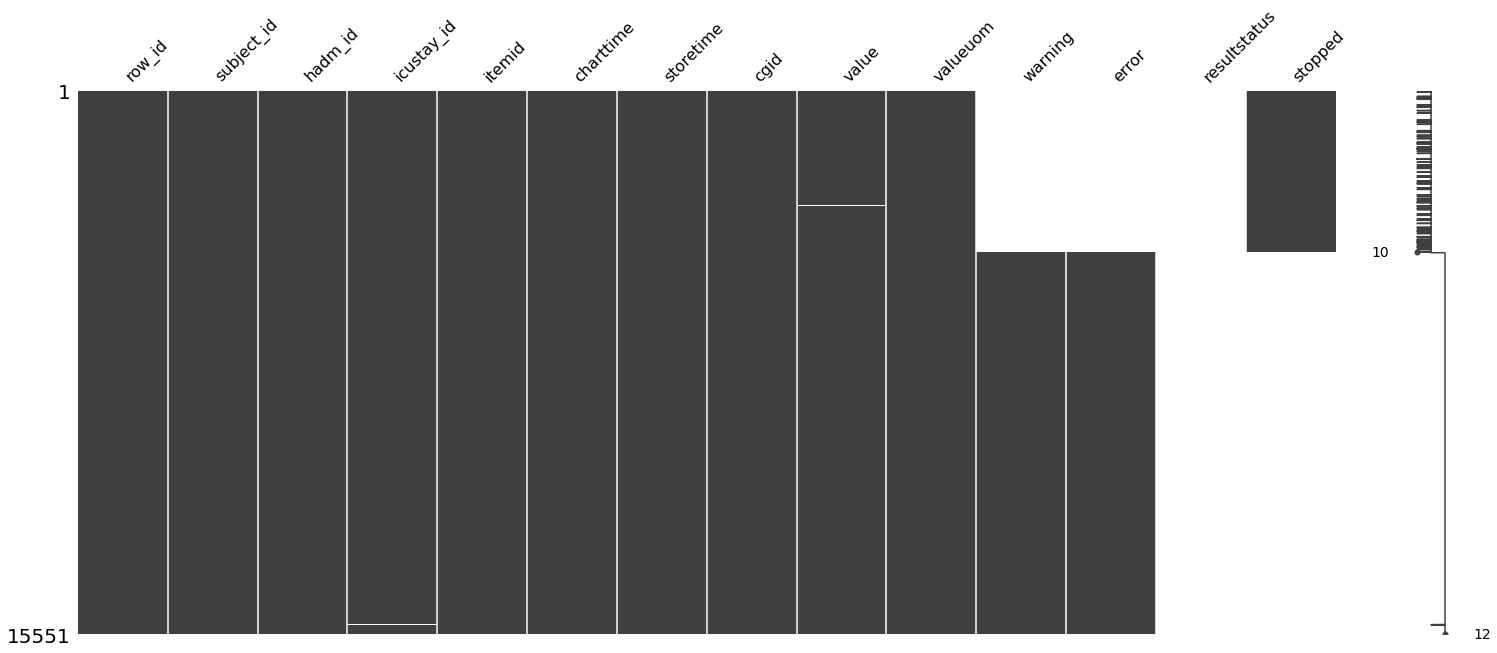

In [27]:
msno.matrix(df_datetimeevents)  # Valores nulos visto gráficamente

### Valores nulos:

## Tabla 'INPUTEVENTS_CV' o '¿entrada de eventos cv?'

+ Descripción de la tabla: Admision de pacientes monitorizados con el sistema Philips CareVue durante su estadia en la UCI

In [28]:
df_inputevents_cv.head(3)   # Mostramos las primeras filas

,row_id,subject_id,hadm_id,icustay_id,charttime,itemid,amount,amountuom,rate,rateuom,...,orderid,linkorderid,stopped,newbottle,originalamount,originalamountuom,originalroute,originalrate,originalrateuom,originalsite
0,1184,10114,167957,234989,2171-11-03 15:00:00,30056,400.0,ml,NaN,NaN,...,2557279,2557279,NaN,NaN,NaN,ml,Oral,NaN,NaN,NaN
1,1185,10114,167957,234989,2171-11-03 20:00:00,30056,120.0,ml,NaN,NaN,...,7828849,2557279,NaN,NaN,NaN,ml,Oral,NaN,NaN,NaN
2,1186,10114,167957,234989,2171-11-03 23:00:00,30056,120.0,ml,NaN,NaN,...,2744159,2557279,NaN,NaN,NaN,ml,Oral,NaN,NaN,NaN


Campos:
+ row_id:
+ subject_id:
+ hadm_id:
+ icustay_id:
+ charttime:
+ itemid:
+ amount:
+ amountuom:
+ rate:
+ rateuom:
+ storetime:
+ cgid:
+ orderid:
+ linkorderid:
+ stopped:
+ newbottle:
+ originalamount:
+ originalamountuom:
+ originalroute:
+ originalrate:
+ originalrateuom:
+ originalsite:

In [26]:
print("Valores únicos por cada columna: \n")

print("row_id:", df_inputevents_cv['row_id'].nunique() )
print("subject_id:", df_inputevents_cv['subject_id'].nunique() )
print("hadm_id:", df_inputevents_cv['hadm_id'].nunique() )
print("icustay_id:", df_inputevents_cv['icustay_id'].nunique() )
print("charttime:", df_inputevents_cv['charttime'].nunique() )
print("itemid:", df_inputevents_cv['itemid'].nunique() )
print("amount:", df_inputevents_cv['amount'].nunique() )
print("amountuom:", df_inputevents_cv['amountuom'].nunique() )
print("rate:", df_inputevents_cv['rate'].nunique() )
print("rateuom:", df_inputevents_cv['rateuom'].nunique() )
print("storetime:", df_inputevents_cv['storetime'].nunique() )
print("cgid:", df_inputevents_cv['cgid'].nunique() )
print("orderid:", df_inputevents_cv['orderid'].nunique() )
print("linkorderid:", df_inputevents_cv['linkorderid'].nunique() )
print("stopped:", df_inputevents_cv['stopped'].nunique() )
print("newbottle:", df_inputevents_cv['newbottle'].nunique() )
print("originalamount:", df_inputevents_cv['originalamount'].nunique() )
print("originalamountuom:", df_inputevents_cv['originalamountuom'].nunique() )
print("originalroute:", df_inputevents_cv['originalroute'].nunique() )
print("originalrate:", df_inputevents_cv['originalrate'].nunique() )
print("originalrateuom:", df_inputevents_cv['originalrateuom'].nunique() )
print("originalsite:", df_inputevents_cv['originalsite'].nunique() )

Valores únicos por cada columna: 

row_id: 34799
subject_id: 48
hadm_id: 55
icustay_id: 57
charttime: 6913
itemid: 79
amount: 1686
amountuom: 5
rate: 292
rateuom: 8
storetime: 6743
cgid: 272
orderid: 18077
linkorderid: 621
stopped: 4
newbottle: 1
originalamount: 41
originalamountuom: 8
originalroute: 7
originalrate: 82
originalrateuom: 1
originalsite: 1


In [29]:
df_inputevents_cv['rateuom'].unique()

array([nan, 'mcgmin', 'mcgkgmin', 'Uhr', 'mghr', 'mgkghr', 'Umin',
       'mcghr', 'mgmin'], dtype=object)

In [29]:
df_inputevents_cv.info()  # Cant de registros, columnas, espacio en memoria, tipo de dato

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34799 entries, 0 to 34798
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   row_id             34799 non-null  int64  
 1   subject_id         34799 non-null  int64  
 2   hadm_id            34799 non-null  int64  
 3   icustay_id         34799 non-null  int64  
 4   charttime          34799 non-null  object 
 5   itemid             34799 non-null  int64  
 6   amount             24738 non-null  float64
 7   amountuom          25003 non-null  object 
 8   rate               9462 non-null   float64
 9   rateuom            9548 non-null   object 
 10  storetime          34799 non-null  object 
 11  cgid               34258 non-null  float64
 12  orderid            34799 non-null  int64  
 13  linkorderid        34799 non-null  int64  
 14  stopped            810 non-null    object 
 15  newbottle          522 non-null    float64
 16  originalamount     212

In [30]:
df_inputevents_cv.drop_duplicates(inplace=True)   # Eliminamos registros duplicados
df_inputevents_cv.shape[0]

34799

No tenia registros duplicados

In [31]:
df_inputevents_cv.isna().sum()  # Valores nulos

row_id                   0
subject_id               0
hadm_id                  0
icustay_id               0
charttime                0
itemid                   0
amount               10061
amountuom             9796
rate                 25337
rateuom              25251
storetime                0
cgid                   541
orderid                  0
linkorderid              0
stopped              33989
newbottle            34277
originalamount       13585
originalamountuom     9565
originalroute           17
originalrate         23288
originalrateuom      23284
originalsite         34793
dtype: int64

<AxesSubplot:>

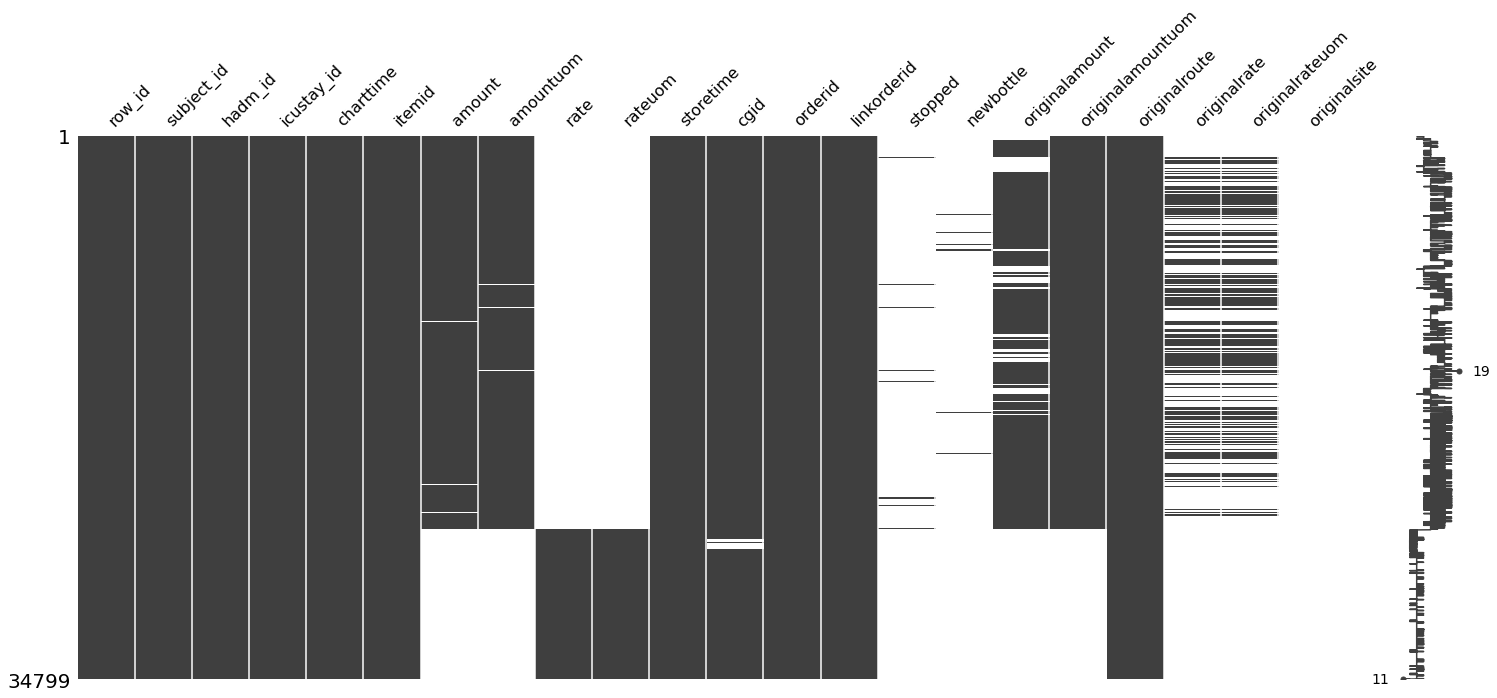

In [32]:
msno.matrix(df_inputevents_cv)  # Valores nulos visto gráficamente

### Valores nulos: